<div class="alert alert-block alert-info">
<b>Note:</b><br>

- For the year 2018, there is no data for Nov and Dec months. Therefore, the below figures for 2018 will be misleading.<br>
- The style of the bar charts is not visible in this notebook (highlight bar charts applied for Percent of Property sold by CouncilArea and Regions.And also Mean, Min-Max distance to City by Council Areas). However, it will be visible when you execute this notebook from your computer.<br>
</div>

## Introduction.
- In this data analysis exercise, I have analyzed the house prices in the City of Melbourne, Australia. Answering questions like which suburbs are the most expensive, the median price, distance to the city and any seasonality exists in the sales price.

## Data Attributes.
     1. Suburb: Suburb
     2. Address: Address
     3. Rooms: Number of rooms
     4. Price: Price in Australian dollars
     5. Method:
         S - property sold;
         SP - property sold prior;
         PI - property passed in;
         PN - sold prior not disclosed;
         SN - sold not disclosed;
         NB - no bid;
         VB - vendor bid;
         W - withdrawn prior to auction;
         SA - sold after auction;
         SS - sold after auction price not disclosed.
         N/A - price or highest bid not available.
    6. Type:
        br - bedroom(s);
        h - house,cottage,villa, semi,terrace;
        u - unit, duplex;
        t - townhouse;
        dev site - development site;
        o res - other residential.

    7. SellerG: Real Estate Agent
    8. Date: Date sold
    9. Distance: Distance from CBD in Kilometres
    10. Regionname: General Region (West, North West, North, North east …etc)
    11. Propertycount: Number of properties that exist in the suburb.
    12. CouncilArea: Governing council for the area

In [1]:
# import relevant libraries.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn; seaborn.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
# border creation

In [3]:
# import data.
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
print('Data set contains {a} rows and {b} columns'.format(a=df.shape[0], b=df.shape[1]))

Data set contains 63023 rows and 13 columns


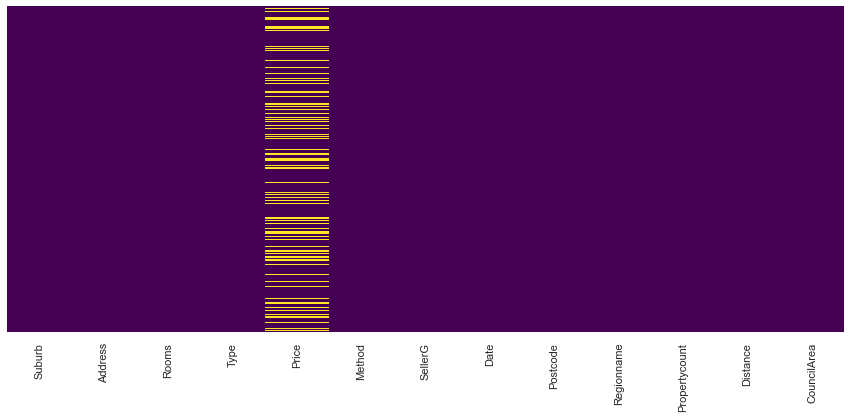

In [5]:
# visualize the missing values in a data frame.
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [6]:
#check for missing values.
df.isnull().sum().sort_values(ascending=False)

Price            14590
Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

- We have quiet a lot missing values for Price column.

In [7]:
# for this excercise i will use only non missing data
missing_df = df[df['Price'].notnull()]
missing_df.isnull().sum().sort_values(ascending=False)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [8]:
# make a copy of non missing data
df = missing_df.copy()

In [9]:
# check basic statistics numerical data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,48433.0,3.071666,0.944708,1.0,2.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Postcode,48433.0,3123.210332,125.534940,3000.0,3051.0,3103.0,3163.0,3980.0
Propertycount,48433.0,7566.399913,4457.405884,39.0,4280.0,6567.0,10412.0,21650.0
Distance,48433.0,12.702761,7.550030,0.0,7.0,11.7,16.7,55.8


- On an average there are 3 rooms. Max rooms is 31.
- Median property price is 830k. Min property value is 85k and max being 11mil.
- Average distance to city is 12 killometers, max being 56 and min being 0.

In [10]:
# check basic statistics of categorical data.
df.describe(include='object').T

,count,unique,top,freq
Suburb,48433,370,Reservoir,1067
Address,48433,44739,56 Victoria St,7
Type,48433,3,h,34161
Method,48433,5,S,30624
SellerG,48433,422,Barry,4818
Date,48433,112,24/03/2018,880
Regionname,48433,8,Northern Metropolitan,13598
CouncilArea,48433,34,Darebin City Council,3462


- We have 370 suburbs, most frequent suburb is Rsservoir appeared 1067 times.
- 14 Moray St: most frequent sold property, 7 times in the last 3 years.
- 3 Types of property and most frequent type of property is h (house)
- There are 5 types of selling method, most common method is S (property sold)
- There are 422 agents and most of the property sold by agent Barry by 4818 times.
- On 24/03/2018 there were 880 property sold across Victoria State.
- There are 8 regions, most of the property sold in Northern Metropolitan (13598 property sold).
- There are 34 councils, Darebin City Council sold most property.

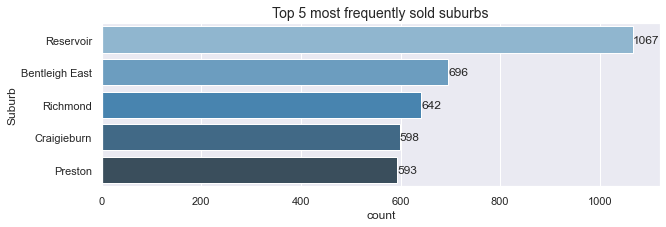

In [11]:
plt.figure(figsize=(10,3))
ax = sns.countplot(y="Suburb", palette="Blues_d", data=df, order=df.Suburb.value_counts().iloc[:5].index);
plt.title('Top 5 most frequently sold suburbs', fontsize=14);
ax.bar_label(ax.containers[0]);

- Suburb Reservoir sold 1067 properties, followed by Bentleigh East by 696, Richmond by 642, Craigieburn by 598 and Preston by 593.

In [12]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature,font_size):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = font_size) # annotate the percantage

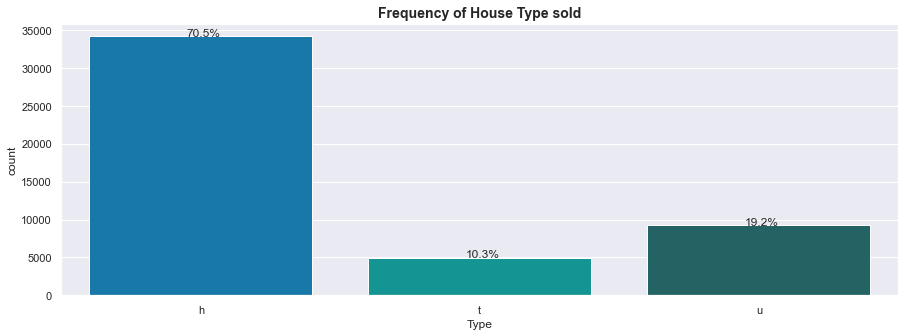

In [13]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Type',data=df,palette='winter_d');
plt.title('Frequency of House Type sold', weight='bold').set_fontsize('14')
bar_perc(ax,df['Type'],font_size=12)

- House, Cottage or Villa account for 70.5%, Unit is made up of 19.2%, Townhouse or Development size is just 10.3%.

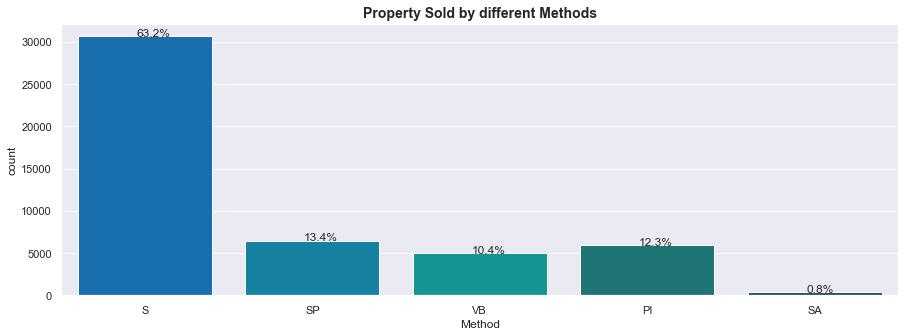

In [14]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Method',data=df,palette='winter_d');
plt.title('Property Sold by different Methods', weight='bold').set_fontsize('14')
bar_perc(ax,df['Method'],font_size=12)

- 63.2% of the of the property sold directly. Property passed in is 13.4%, least being Sold after auction price not disclosed is 0.8%.

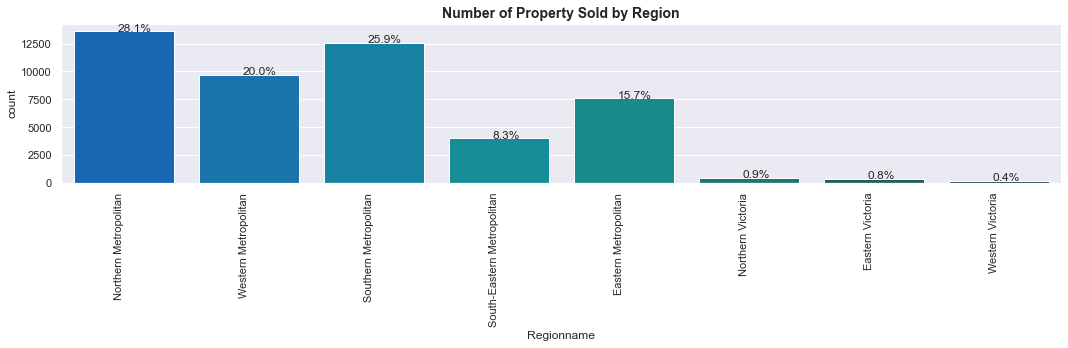

In [15]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Regionname',data=df,palette='winter_d');
plt.title('Number of Property Sold by Region', weight='bold').set_fontsize('14')
bar_perc(ax,df['Regionname'],font_size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

- From the above we can observe that Northern Metropolitan and Sourther Metropolitan having higher number of property sold. Least being Western Victoria. 

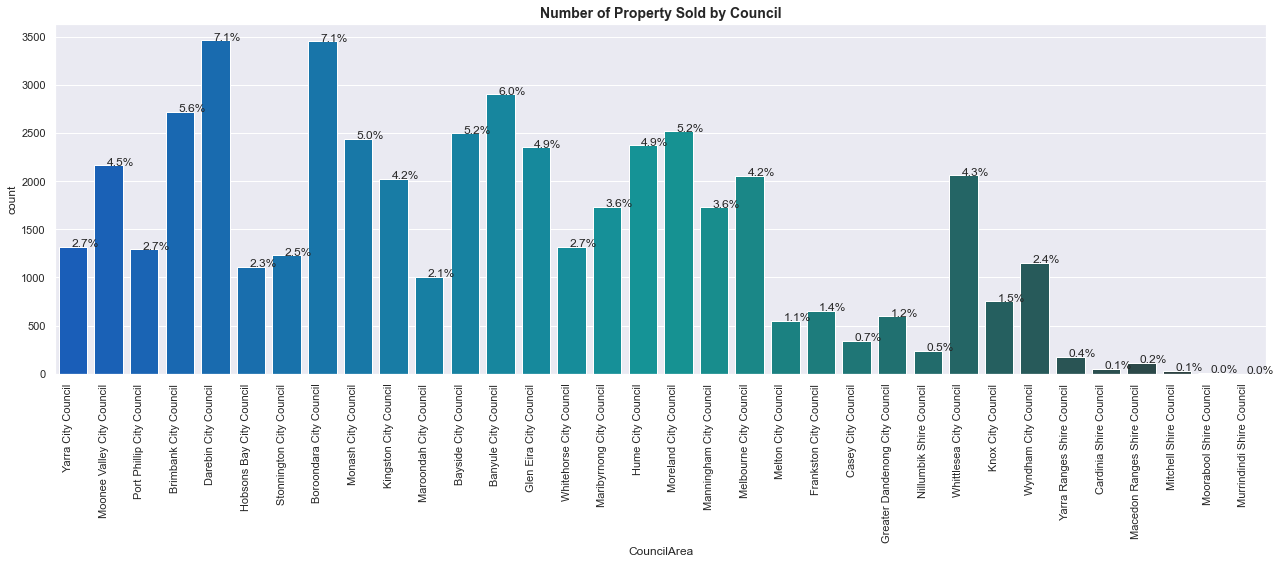

In [16]:
plt.figure(figsize=(18,8))
ax=sns.countplot(x='CouncilArea',data=df,palette='winter_d',orient='h');
plt.title('Number of Property Sold by Council', weight='bold').set_fontsize('14')
bar_perc(ax,df['CouncilArea'],font_size=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

- From the above we can observe that Boroondara City Council and Boroondara City Council having higher number of Property sold. Least being Murrindindi Shire Council and Moorabool Shire Council.

### Price Distribution analysis

In [17]:
# create arrays by regions
all_regions = df['Price'].values
northern_metropolitan = df['Price'].loc[df['Regionname'] == 'Northern Metropolitan'].values
southern_metropolitan = df['Price'].loc[df['Regionname'] == 'Southern Metropolitan'].values
eastern_metropolitan = df['Price'].loc[df['Regionname'] == 'Eastern Metropolitan'].values
western_metropolitan = df['Price'].loc[df['Regionname'] == 'Western Metropolitan'].values
southeastern_metropolitan = df['Price'].loc[df['Regionname'] == 'South-Eastern Metropolitan'].values
northern_victoria = df['Price'].loc[df['Regionname'] == 'Northern Victoria'].values
eastern_victoria = df['Price'].loc[df['Regionname'] == 'Eastern Victoria'].values
western_victoria = df['Price'].loc[df['Regionname'] == 'Western Victoria'].values

In [18]:
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(10,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

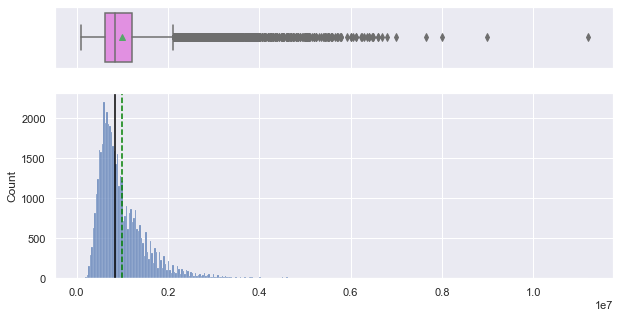

In [19]:
# Price distribution for all regions.
histogram_boxplot(all_regions)

- From the above we can obseve that the overall median price is around 830k and the average price is around 990k.

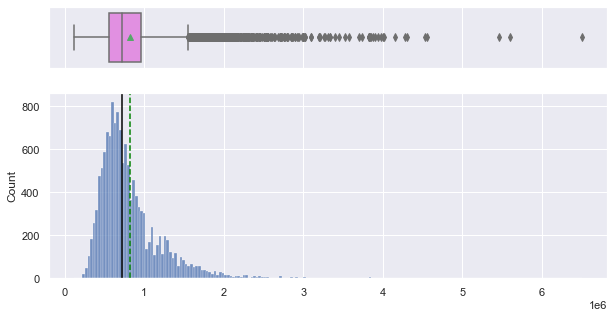

In [20]:
# Price distribution of norther metropolitan
histogram_boxplot(northern_metropolitan)

- From the above, we can observe that the Northern Metropolitan median price is around 715k, and the average price is around 820k.

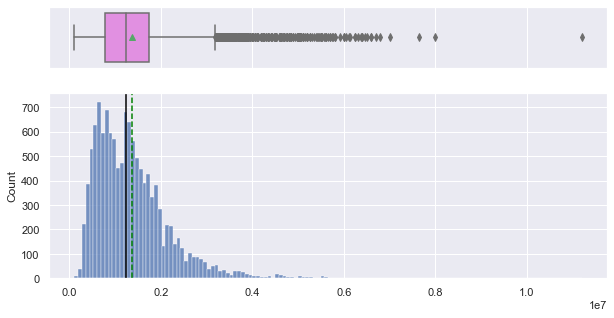

In [21]:
# Price distribution of southern metropolitan
histogram_boxplot(southern_metropolitan)

- From the above, we can observe that the Southern Metropolitan median price is around 1.2mil, and the average price is around 1.3 million.

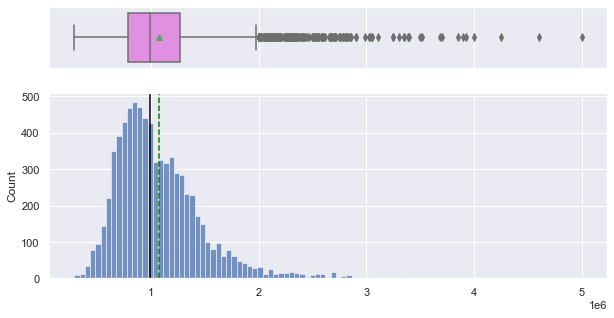

In [22]:
# Price distribution of eastern metropolitan
histogram_boxplot(eastern_metropolitan)

- From the above, we can observe that the Eastern Metropolitan median price is around 990k, and the average price is around 1 million.

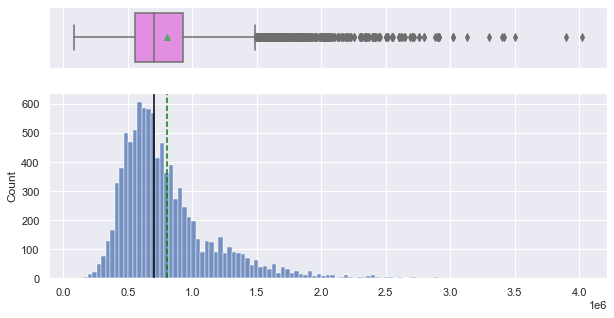

In [23]:
# analyze the pct of western metropolitan
histogram_boxplot(western_metropolitan)

- From the above, we can observe that the Western Metropolitan median price is around 700k, and the average price is around 800k.

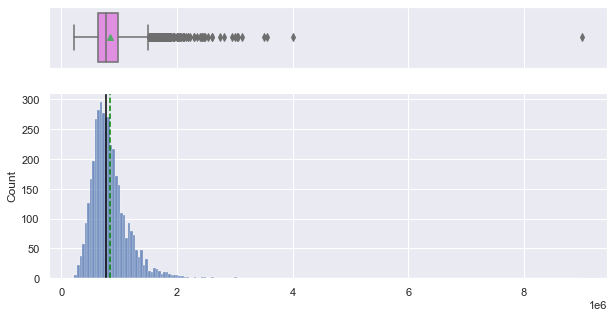

In [24]:
# Price distribution of southern metropolitan
histogram_boxplot(southeastern_metropolitan)

- From the above, we can observe that the Southern Eastern Metropolitan median price is around 780k, and the average price is around 840k.

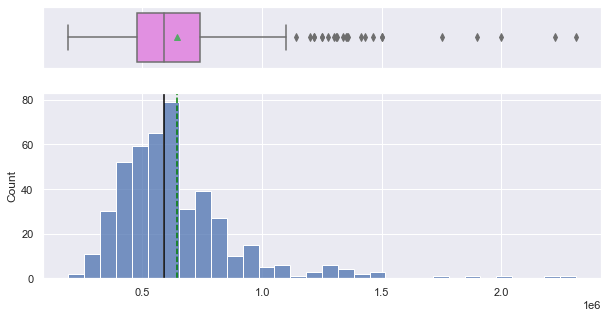

In [25]:
# Price distribution of northern victoria
histogram_boxplot(northern_victoria)

- From the above, we can observe that the Northern Victoria median price is around 590k, and the average price is around 640k.

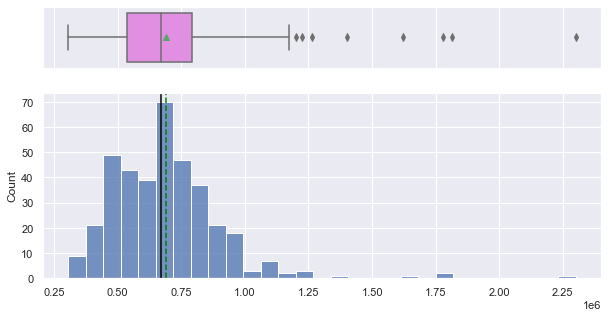

In [26]:
# Price distribution of eastern victoria
histogram_boxplot(eastern_victoria)

- From the above, we can observe that the Western Victoria median price is around 670k, and the average price is around 680k.

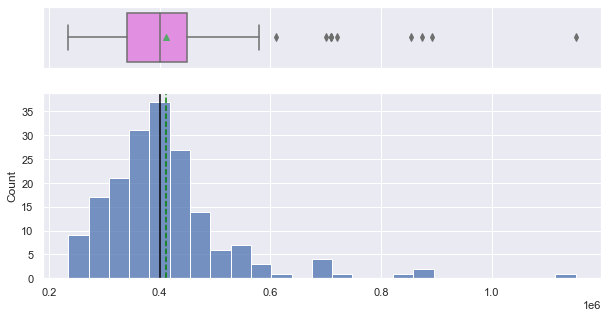

In [27]:
# Price distribution of western victoria
histogram_boxplot(western_victoria)

- From the above, we can observe that the Western Victoria median price is around 400k, and the average price is around 412k.

- From the above Price distribution for each Region and overall we can observe that the property price has more varation for the higher price values. (Positive skewed.)
- Northern, Eastern and Western Victoria we can observe price of the properties are lesser comparing to other Regions.
- Souther Metropolitan region is very expensive, median property price is more than a million. 

### Seasonality analysis.
- Are there any patterns in different seasons or time of Sales?

In [28]:
# chck the date type.
df['Date'].dtype

dtype('O')

- Date is in Object type format.

In [29]:
# Convert  date to Datetime Format and keept it as ddmmyy format.
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [30]:
# create month and year columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [31]:
# assign total sales to a variable
total_sales = df['Price'].sum()
total_sales

48331205530.0

In [32]:
# create percent of sales by month from total sales.
jan_sales = df['Price'].loc[df['Month'] == 1].sum()/total_sales
feb_sales = df['Price'].loc[df['Month'] == 2].sum()/total_sales
mar_sales = df['Price'].loc[df['Month'] == 3].sum()/total_sales
apr_sales = df['Price'].loc[df['Month'] == 4].sum()/total_sales
may_sales = df['Price'].loc[df['Month'] == 5].sum()/total_sales
jun_sales = df['Price'].loc[df['Month'] == 6].sum()/total_sales
jul_sales = df['Price'].loc[df['Month'] == 7].sum()/total_sales
aug_sales = df['Price'].loc[df['Month'] == 8].sum()/total_sales
sep_sales = df['Price'].loc[df['Month'] == 9].sum()/total_sales
oct_sales = df['Price'].loc[df['Month'] == 10].sum()/total_sales
nov_sales = df['Price'].loc[df['Month'] == 11].sum()/total_sales
dec_sales = df['Price'].loc[df['Month'] == 12].sum()/total_sales

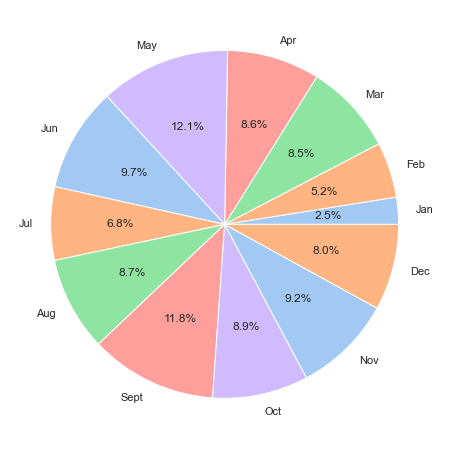

In [33]:
#define data
data = [jan_sales, feb_sales, mar_sales, apr_sales, may_sales, jun_sales, jul_sales, aug_sales, sep_sales, oct_sales,
       nov_sales, dec_sales ]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(20,8))
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

-  From the above, we can observe that Aug to Dec we see a higher proportion of Sales. However, after December we can see the proportion of sales is less until Feb and then again it picks up in March Until May and then drops gradually. 
- Jan and Feb we can observe the proportion of sales are minimal, after Feb we can see a gradual increase in sales.

In [34]:
# break it down by year and see how the sales for each year.
sales_2016 = df['Price'].loc[df['Year'] == 2016].sum()/total_sales
sales_2017 = df['Price'].loc[df['Year'] == 2017].sum()/total_sales
sales_2018 = df['Price'].loc[df['Year'] == 2018].sum()/total_sales

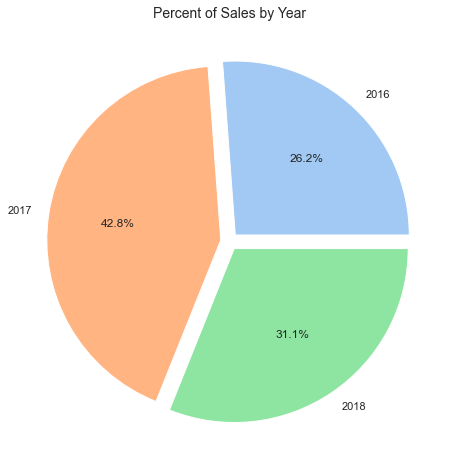

In [35]:
data = [sales_2016, sales_2017, sales_2018]
labels = ['2016', '2017', '2018']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(20,8))
plt.title("Percent of Sales by Year", fontsize=14);
#create pie chart
plt.pie(data, labels = labels, explode=[0.05]*3, colors = colors, autopct='%.1f%%',)
plt.show()

- From the above, we can observe that in the year 2016, the total sales were 26.2% and then in 2017, sales were 42.8%, and in 2018 it was 31.1%.
- **Note:** for 2018 we do not have data from Nov to Dec months, so 2018 data is not complete.

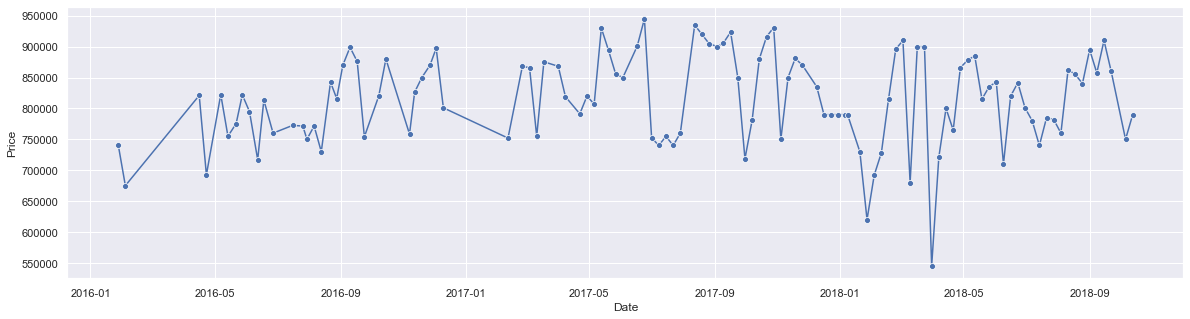

In [36]:
# Time series analysis of sales price from 2016 - 2018
plt.figure(figsize=(20,5))
sns.lineplot(data = df, x='Date',y='Price', ci=None, estimator='median', marker='o');

- From the above, we can observe a lot of variations in the sales price. In a given year, we can see a different part of time or monthly price goes up and comes down. For example, in the year 2018, around March or April, Prices fell to the lowest. Soon after this, it picked up.  Overall we can see that the median price of the house remains close to 800k. 

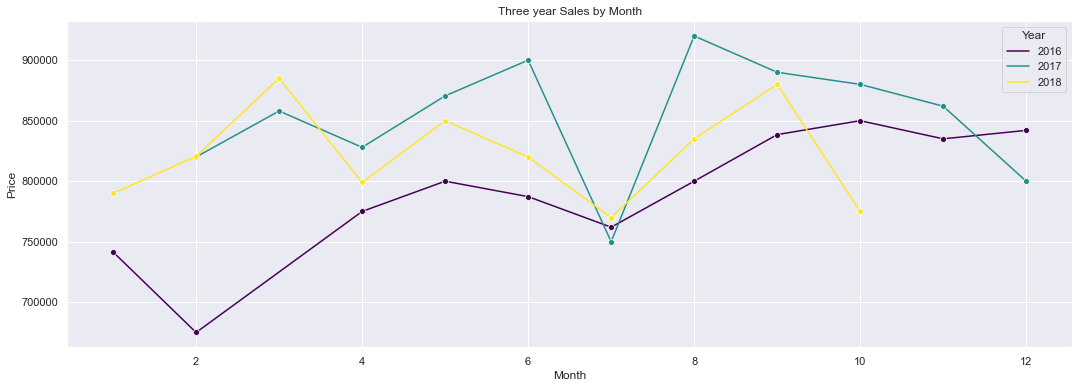

In [37]:
#analyze sales by month for each year.
plt.figure(figsize=(18,6))
plt.title('Three year Sales by Month').set_fontsize('12') # weight='bold'
sns.lineplot(x='Month', y='Price', data=df, hue='Year', estimator='median', palette='viridis', ci=None, marker='o',);

- Year 2016 we can observe upward trend, From Feb Sales prices picks up, during mid of July price drops and then it follows upward trend.
- Year 2017 we can see the median starting price is from 850k  then drops in mid of July then shots up in August and then slowly decreases.
- Year 2018 we can observe the same trend of 2017. But in September the price drops down drastically. From Oct we dont have data, so we are not sure whether the price picked up or not.

In [38]:
# create seasons based on months
df['Season'] = np.nan
df.loc[(df['Month'] > 2) & (df['Month'] <= 5), 'Season'] = 'Spring'
df.loc[(df['Month'] > 5) & (df['Month'] <= 8), 'Season'] = 'Summer'
df.loc[(df['Month'] > 8) & (df['Month'] <= 11), 'Season'] = 'Autumn'
df.loc[df['Month'] <= 2, 'Season'] = 'Winter'
df.loc[df['Month'] == 12, 'Season'] = 'Winter'

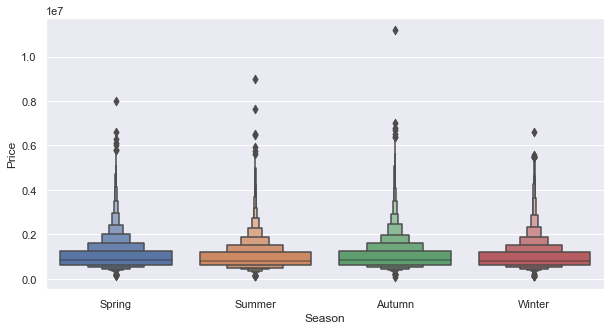

In [39]:
plt.figure(figsize=(10,5))
sns.boxenplot(x="Season", y="Price", data=df);

- From the above we can observe that Price is higher during Autumn, followed by Spring and Summer. Autumn season where price is lowest.

In [40]:
# lets analyze the percent of sales price by season
tot_sales = df['Price'].sum()

spring_sales = df['Price'].loc[(df['Season']=='Spring')].sum()/tot_sales
summer_sales = df['Price'].loc[(df['Season']=='Summer')].sum()/tot_sales
autumn_sales = df['Price'].loc[(df['Season']=='Autumn')].sum()/tot_sales
winter_sales = df['Price'].loc[(df['Season']=='Winter')].sum()/tot_sales

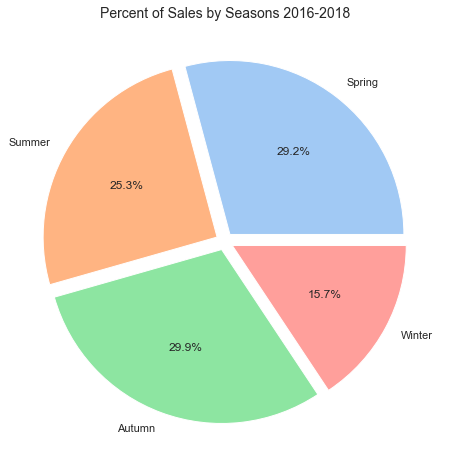

In [41]:
# create pie chart
labels = ['Spring','Summer', 'Autumn', 'Winter']
#define data
data = [spring_sales, summer_sales, autumn_sales, winter_sales]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(20,8))
plt.title("Percent of Sales by Seasons 2016-2018", fontsize=14);
#create pie chart
plt.pie(data, labels = labels, explode=[0.05]*4, colors = colors, autopct='%.1f%%')
plt.show();

- From the above we can observe that percent of price for Autumn is 29.9%, then summer it is 25.3%, spring is 29.2. Winter we can observe it accounts only 15.7%.

In [42]:
# distribution of sales by Season for the year 2016
sales_2016 = df['Price'].loc[(df['Year']==2016)].sum()

spring_2016 = df['Price'].loc[(df['Year']==2016) & (df['Season']=='Spring')].sum()/sales_2016
summer_2016 = df['Price'].loc[(df['Year']==2016) & (df['Season']=='Summer')].sum()/sales_2016
autumn_2016 = df['Price'].loc[(df['Year']==2016) & (df['Season']=='Autumn')].sum()/sales_2016
winter_2016 = df['Price'].loc[(df['Year']==2016) & (df['Season']=='Winter')].sum()/sales_2016

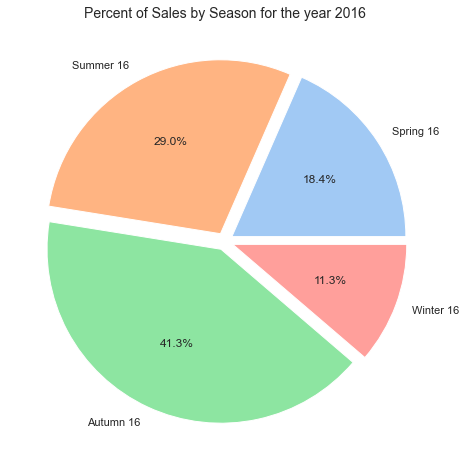

In [43]:
# distribution of sales by Season for the year 2016
labels = ['Spring 16','Summer 16', 'Autumn 16', 'Winter 16']
#define data
data = [spring_2016, summer_2016, autumn_2016, winter_2016]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(20,8))
plt.title("Percent of Sales by Season for the year 2016", fontsize=14);
#create pie chart
plt.pie(data, labels = labels, explode=[0.05]*4, colors = colors, autopct='%.1f%%')
plt.show();

In [44]:
# lets break it down by year and observe the trend
sales_2017 = df['Price'].loc[(df['Year']==2017)].sum()

spring_2017 = df['Price'].loc[(df['Year']==2017) & (df['Season']=='Spring')].sum()/sales_2017
summer_2017 = df['Price'].loc[(df['Year']==2017) & (df['Season']=='Summer')].sum()/sales_2017
autumn_2017 = df['Price'].loc[(df['Year']==2017) & (df['Season']=='Autumn')].sum()/sales_2017
winter_2017 = df['Price'].loc[(df['Year']==2017) & (df['Season']=='Winter')].sum()/sales_2017

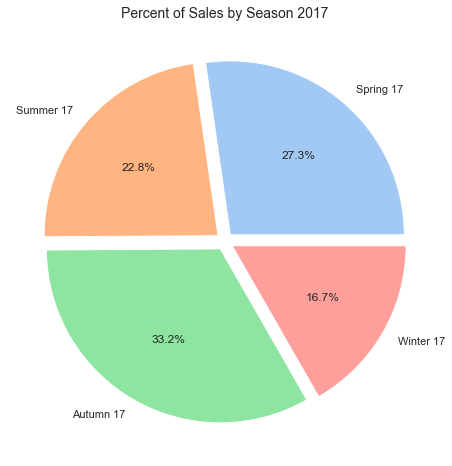

In [45]:
# distribution of sales by Season for the year 2017
labels = ['Spring 17','Summer 17', 'Autumn 17', 'Winter 17']
#define data
data = [spring_2017, summer_2017, autumn_2017, winter_2017]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(20,8))
plt.title("Percent of Sales by Season 2017", fontsize=14);
#create pie chart
plt.pie(data, labels = labels, explode=[0.05]*4, colors = colors, autopct='%.1f%%')
plt.show();

In [46]:
# lets break it down by year and observe the trend
sales_2018 = df['Price'].loc[(df['Year']==2018)].sum()

spring_2018 = df['Price'].loc[(df['Year']==2018) & (df['Season']=='Spring')].sum()/sales_2018
summer_2018 = df['Price'].loc[(df['Year']==2018) & (df['Season']=='Summer')].sum()/sales_2018
autumn_2018 = df['Price'].loc[(df['Year']==2018) & (df['Season']=='Autumn')].sum()/sales_2018
winter_2018 = df['Price'].loc[(df['Year']==2018) & (df['Season']=='Winter')].sum()/sales_2018

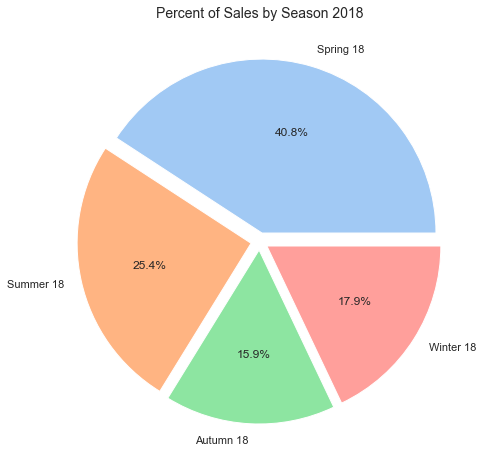

In [47]:
# distribution of sales by Season for the year 2018
labels = ['Spring 18','Summer 18', 'Autumn 18', 'Winter 18']
#define data
data = [spring_2018, summer_2018, autumn_2018, winter_2018]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(20,8))
plt.title("Percent of Sales by Season 2018", fontsize=14);
#create pie chart
plt.pie(data, labels = labels, explode=[0.05]*4, colors = colors, autopct='%.1f%%')
plt.show();

- Year 2016 and 2017 we can see the trend remains the same for each season. However for latest year 2018 trend changed.
- For the year 2016 and 2017 highest sales accounted in the Autumn and least was in Winter.
- However, for the year 2018 higher proportion of sales was in Spring and least was in Autumn.
- **Note:** 2018 we do not hvae data from Nov to Dec, therefore above chart will be misleading.

### Analysis on Regions
- Analyze the total price distribution for each regions.

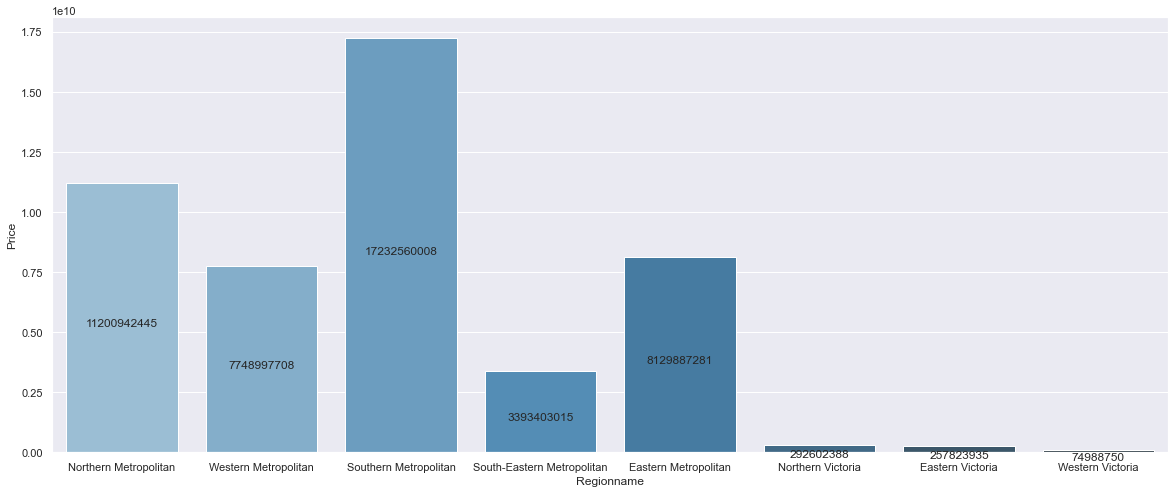

In [90]:
# analyze price by region
plt.figure(figsize=(20,8))
ax = sns.barplot(x='Regionname', y='Price', data=df, estimator=np.median, ci=None, palette='Blues_d') # order=df.sort_values(by='Price').Regionname
ax.bar_label(ax.containers[0],  fmt='\n%.0f', label_type='center');

- Southern Metropolitan: Is the region with the highest percentage of sales of all regions 17 Billion approximately.
- Western Victoria: Is the region with the lowest percentage of sales 74million.
- Northern Metropolitan: Second region with the highest revenue 10 Billion.

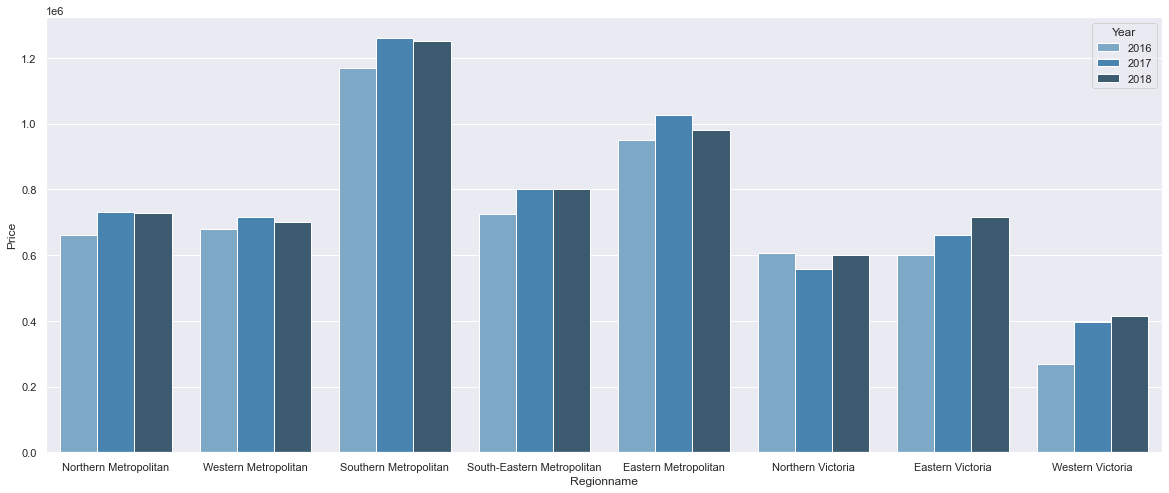

In [49]:
# analyze price by region from 2016-2018
plt.figure(figsize=(20,8))
ax = sns.barplot(x='Regionname', y='Price', hue='Year', data=df, ci=None, estimator=np.median, palette='Blues_d')
#for container in ax.containers:
#   ax.bar_label(container)

- From the above, we can observe that most of the regions median property prices increased as the year advanced. For three areas, median property prices dropped, which are NM, SM, EM. EV and WV show growth by year.
- **Note:** 2018 we do not hvae data from Nov to Dec, therefore above chart will be misleading.

In [50]:
# lets compare the percentage of property sold in each council by region.
df['count'] = 1
two_groups = df.groupby(["Regionname","CouncilArea"]).agg({'count':'sum'})
single_group = df.groupby(['Regionname']).agg({'count':'sum'})
market_share = (two_groups.div(single_group, level='Regionname')*100).round(decimals=2)
market_share.style.bar(subset=['count'], color='#0e92ea')

- In the Eastern Metropolitan, we can observe that Manningham City Council sold the most number of property and the least number of property  sold is in Nillumbik Shire Council.
- In the Eastern Victoria, we can observe that Yarra Ranges Shire Council sold the most number of property and the least number of property sold is in Manningham City Council.
- In the Northern Metropolitan, we can observe that Darebin City Council sold the most number of property and the least number of property sold is in Melbourne City Council.
- In the Northern Victoria, we can observe that Nillumbik Shire Council sold the most number of property and the least number of property sold is in Murrindindi Shire Council.
- In the Southern Eastern Metropolitan, we can observe that Kingston City Council sold the most number of property and the least number of property sold is in Knox City Council.
- In the Southern Metropolitan, we can observe that Boroondara City Council sold the most number of property and the least number of property sold is in Kingston City Council.
- In the Western Metropolitan, we can observe that Brimbank City Council sold the most number of property and the least number of property sold is in Moreland City Council.
- In the Western Victoria, we can observe that Melton City Council sold the property by 92.02% comparing to Moorabool shire council just by 7.98%.

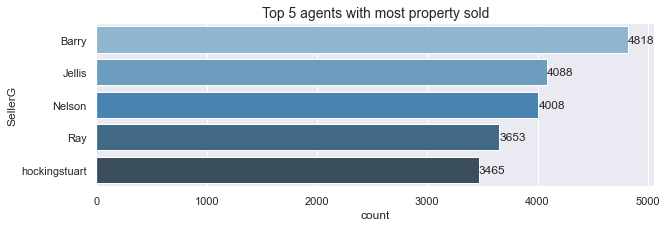

In [51]:
plt.figure(figsize=(10,3))
ax = sns.countplot(y="SellerG", palette="Blues_d", data=df, order=df.SellerG.value_counts().iloc[:5].index);
plt.title('Top 5 agents with most property sold', fontsize=14);
ax.bar_label(ax.containers[0]);

- From the above we can observe that Barry sold most number of Property, followed by Jellis, Nelson Ray and Hockingstuart.

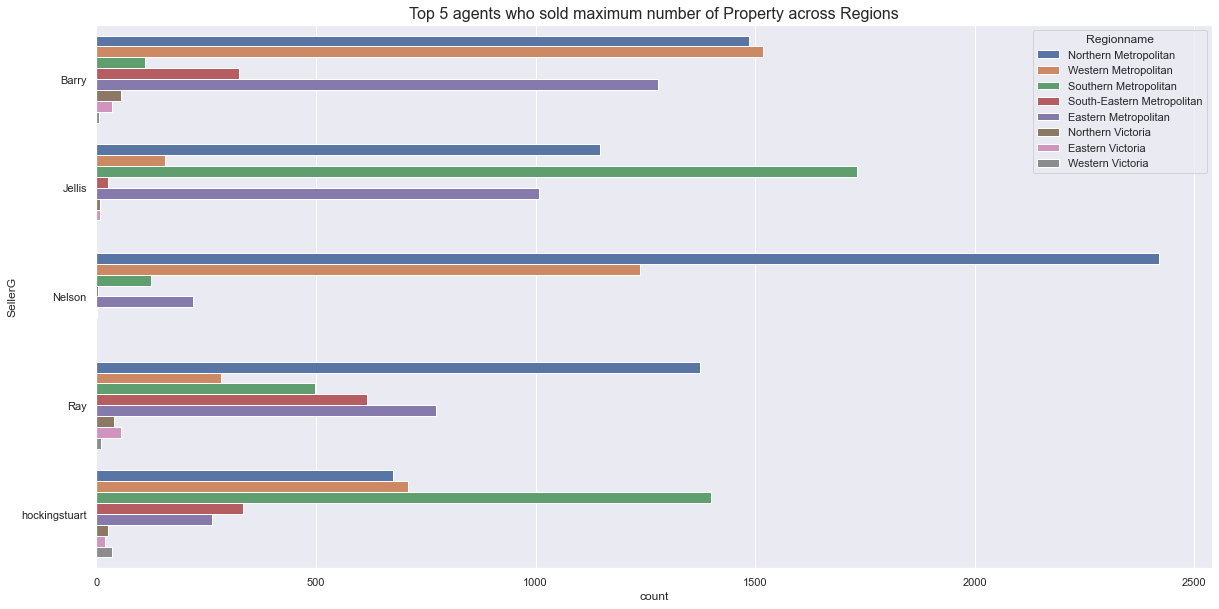

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(y="SellerG", hue='Regionname', data=df, order=df.SellerG.value_counts().iloc[:5].index);
plt.title('Top 5 agents who sold maximum number of Property across Regions', fontsize=16);

- From the above can obseve how the top 5 agents sold the property in different regions.

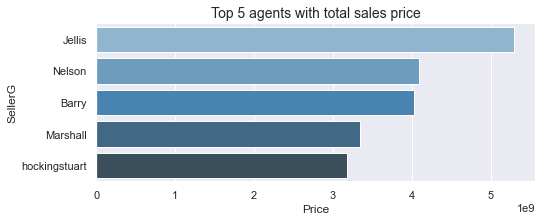

In [53]:
plot_order =df.groupby(['SellerG'])['Price'].sum().sort_values(ascending=False).head().index.values
ax = sns.catplot(data=df, x='Price',  y='SellerG',kind='bar', palette="Blues_d",
                 ci=None,estimator=np.sum,legend_out=False, order=plot_order[0:6], height=3.0, aspect=10/4);
plt.title('Top 5 agents with total sales price', fontsize=14);
#ax.cat_label(ax.containers[0]);

- Jesllis sold more than 5billion worth of property, followed by Nelson and Barry by 4 billion and then Marshall and Hockingstuart just above 3 billion.

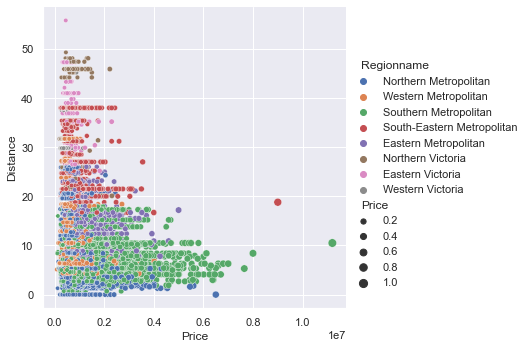

In [54]:
# if distance has any effect on the price
sns.relplot(x='Price', y='Distance', data=df, kind='scatter', size='Price', hue='Regionname');

- From the above, we can observe that Southern Metropolitan has a higher property price when the distance to the city is less than 10km.
- After Southern Metropolitan, we can observe Northern Metropolitan having higher property prices when the kilometres are less than 10km.
- Northern, western and Eastern Victoria, we can observe that when the kilometres are higher, the property price is lesser.

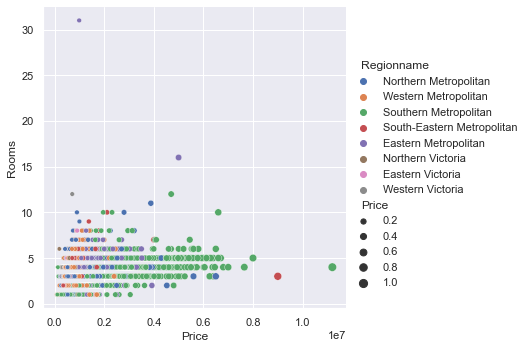

In [55]:
#lets see if Price and Rooms have any affect.
sns.relplot(x='Price', y='Rooms', data=df, kind='scatter', size='Price', hue='Regionname');

- From the above we can obseve that Southern Metropolitan (Green color) having higher price when the when the rooms are between 3-5.
- Souther Eastern Metropolitan got one property close to 900k with the room size of 3.
- Similary 1 property in Souther Metropolitan having the price more than a million for the room size of 4.
- 1 Property in Eastern Metropolitan having more 30 rooms will costed just 100k. Similary another property with 16 rooms just costed 500k in Eastern Metropolitan.

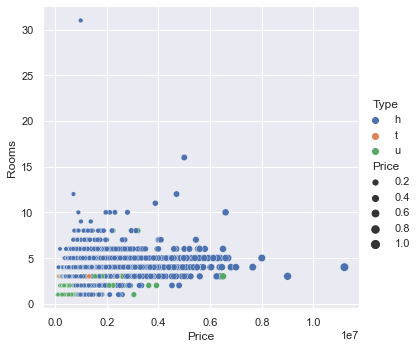

In [56]:
# Price and Rooms relationship
sns.relplot(x='Price', y='Rooms', data=df, kind='scatter', size='Price', hue='Type');

- From the above we can observe that Type H (House) property having higher price, comparing to u (Unit). 
- Type H (house) with 3-5 bedrooms have higher Price comparing to Unit and Townhouse.

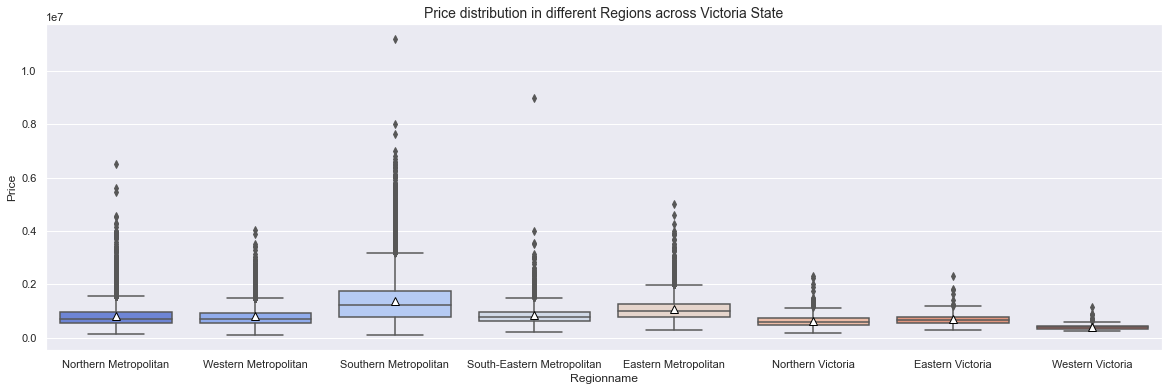

In [57]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Regionname',y='Price',data=df,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
plt.title('Price distribution in different Regions across Victoria State', fontsize=14);

- From the above we can observe that Southern Metropolitan having higher median price, more than a million. Eastern Metroplitan median price is close to million.
- Least median price regions are Western, Northern and Eastern Victoria.
- One property in Souther Metropolitan region will cost more than 10 million. South Eastern Metroplitan got one property which cost more than 8 million.

In [58]:
# breakdown the regions by council to get more insights.
north_metro=df.loc[(df['Regionname']=='Northern Metropolitan')]
south_metro=df.loc[(df['Regionname']=='Southern Metropolitan')]
west_metro=df.loc[(df['Regionname']=='Western Metropolitan')]
east_metro=df.loc[(df['Regionname']=='Eastern Metropolitan')]
se_metro=df.loc[(df['Regionname']=='South-Eastern Metropolitan')]
nrth_vic=df.loc[(df['Regionname']=='Northern Victoria')]
east_vic=df.loc[(df['Regionname']=='Eastern Victoria')]
west_vic=df.loc[(df['Regionname']=='Western Victoria')]

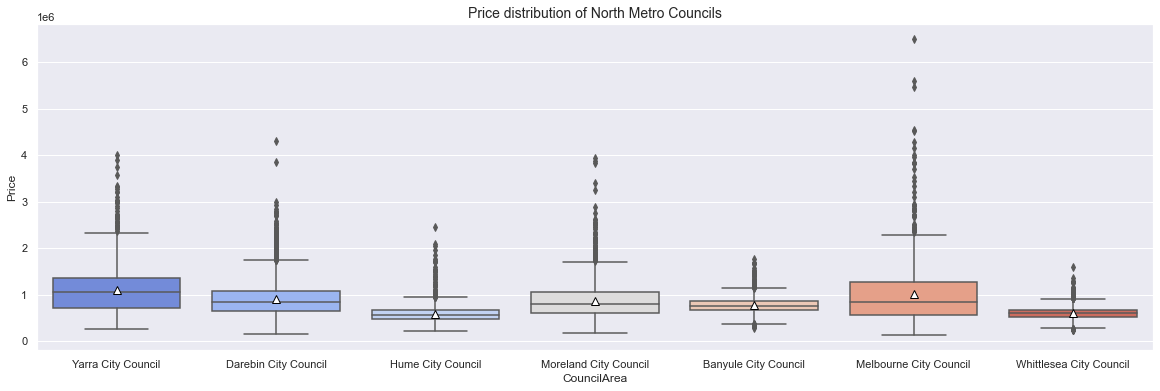

In [59]:
plt.figure(figsize=(20,6))
sns.boxplot(x='CouncilArea',y='Price',data=north_metro,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
plt.title('Price distribution of North Metro Councils', fontsize=14);

- In the North Metro we can observe Melbourne city council. Moreland city council and Darebin City median price are closer to similar.
- Yara City Council having higher medican price comparing to all other councils.
- Hume city council and Whittlesea city council having lower median price comparing to other councils.
- Melbourne having higher range of property price values.

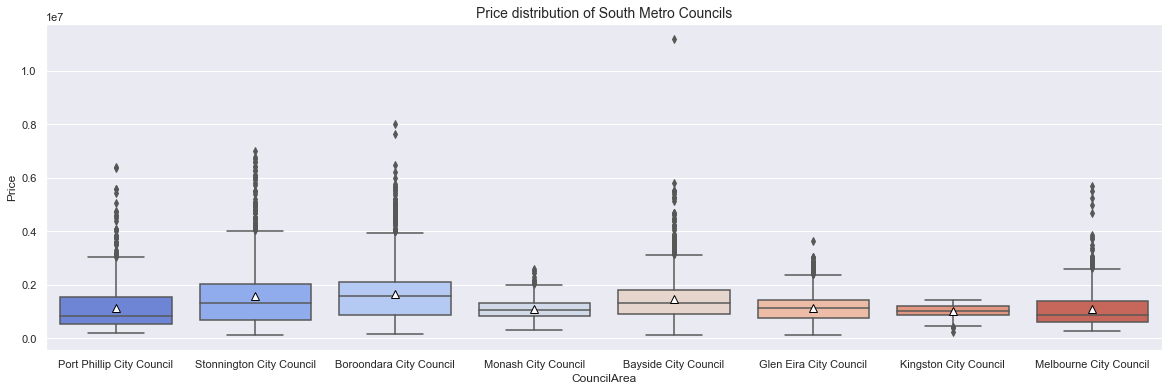

In [60]:
plt.figure(figsize=(20,6))
sns.boxplot(x='CouncilArea',y='Price',data=south_metro,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
plt.title('Price distribution of South Metro Councils', fontsize=14);

- From the above we can observe that in the South Metro Councils Boroondara City Council and Stonnington City Council having higher median price. 
- Lowest medican price councils are Melbourne City Council and Port Phillip City Council.
- In the Bayside city Council we can observe one of the property price is more than a million.

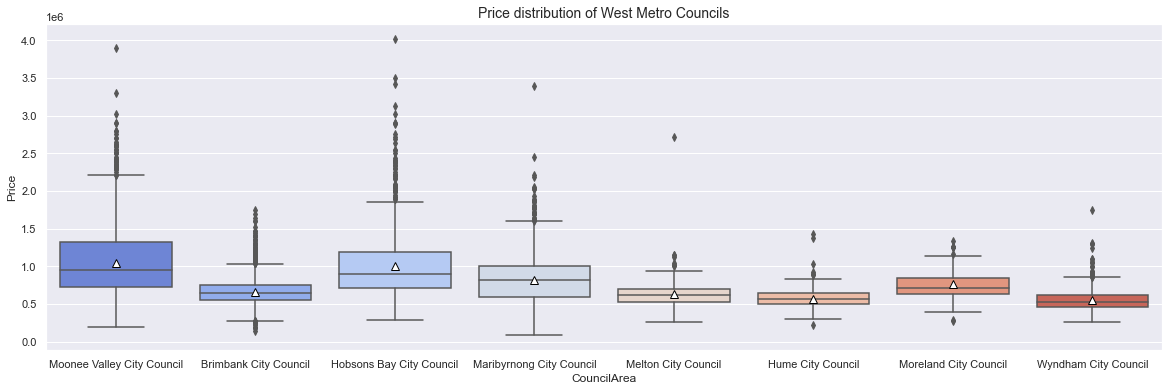

In [61]:
plt.figure(figsize=(20,6))
sns.boxplot(x='CouncilArea',y='Price',data=west_metro,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
plt.title('Price distribution of West Metro Councils', fontsize=14);

- From the above we can observe that Moonee Valley City Council and Hobsons Bay City Council higher median price. Lowest being Wyndham City Council.
- Moonee Valley City Council, Hobsons Bay City Council and Maribyrnong City Council having some higher selling price property.

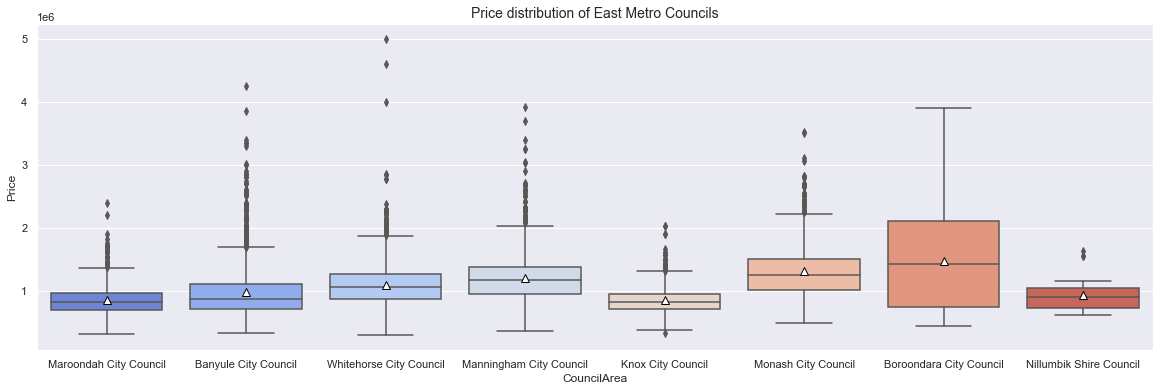

In [62]:
plt.figure(figsize=(20,6))
sns.boxplot(x='CouncilArea',y='Price',data=east_metro,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
plt.title('Price distribution of East Metro Councils', fontsize=14);

- From the above we can observe that Boroondara City Council, Monash City Council, Manningham City Council, Whitehorse City Council  having higher median price, more than a million.
- Whitehorse City Council we can observe some property have higher price.

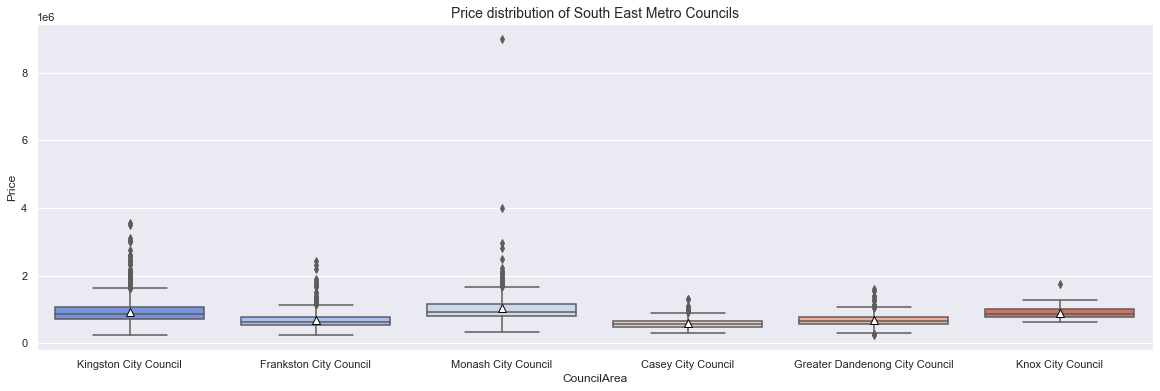

In [63]:
plt.figure(figsize=(20,6))
sns.boxplot(x='CouncilArea',y='Price',data=se_metro,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
plt.title('Price distribution of South East Metro Councils', fontsize=14);

- From the above we can observe Monash City Council having higher median price, followed by Knox city Council. Lowest being Casey City Council.
- Monash City Council we can observe one of the property price is more than 9 million.

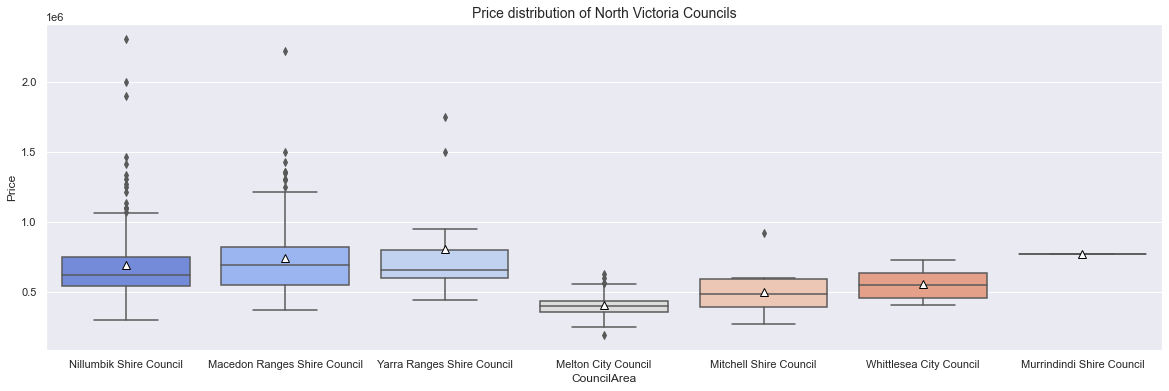

In [64]:
plt.figure(figsize=(20,6))
sns.boxplot(x='CouncilArea',y='Price',data=nrth_vic,palette='coolwarm',showmeans=True,
            meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
plt.title('Price distribution of North Victoria Councils', fontsize=14);

- From the above we can obseve that Murrindindi Shire Council and Macedon Ranges Shire Council higher median price.
- Lowest median council is Melton City Council.
- In Macedon Ranges Shire Council and Nillumbik Shire Council some property price is more than 2 million.

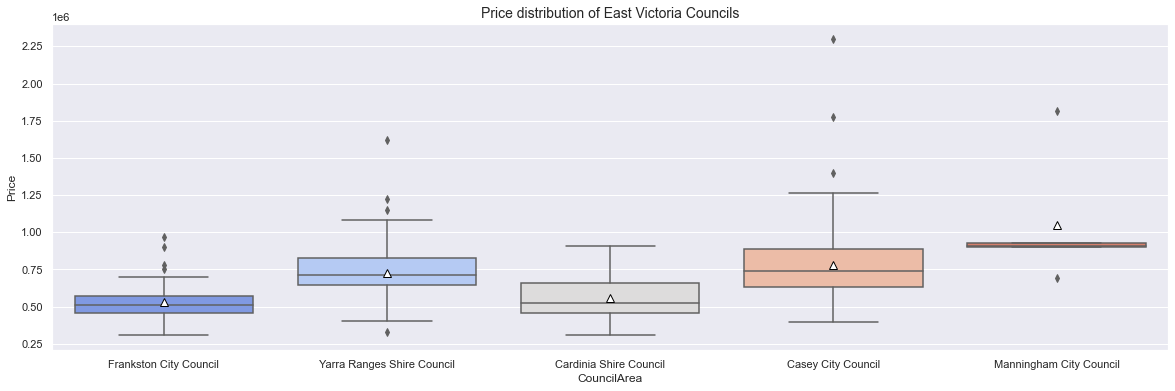

In [65]:
plt.figure(figsize=(20,6))
sns.boxplot(x='CouncilArea',y='Price',data=east_vic,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
plt.title('Price distribution of East Victoria Councils', fontsize=14);

- From the above we can observe that Manningham City Council having higher median price, above 700k.
- Lowest median price is for Frankston City Council.
- In the Casey City Council one property price is mnore than 2 million.

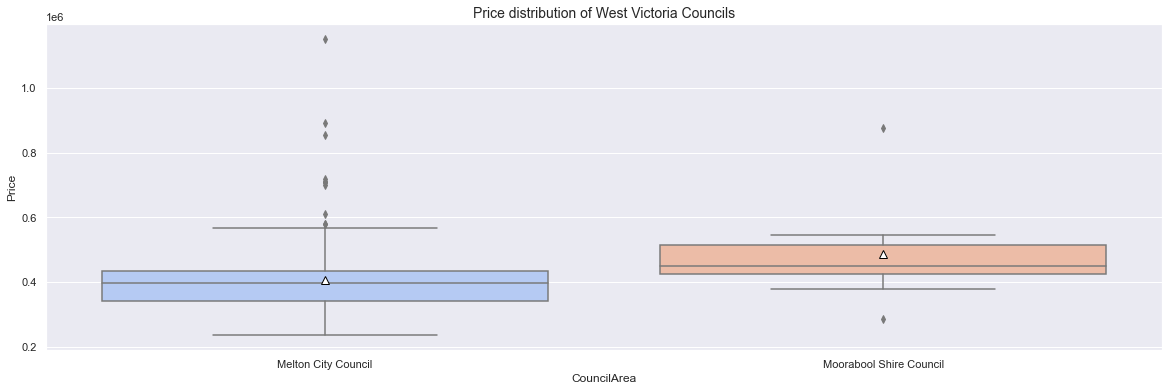

In [66]:
plt.figure(figsize=(20,6)) 
sns.boxplot(x='CouncilArea',y='Price',data=west_vic,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
plt.title('Price distribution of West Victoria Councils', fontsize=14);

- From the above we can observe that Moorabool Shire Council having higher median price. But some properties in Melton City Council cost more than Moorabool Shire Council.

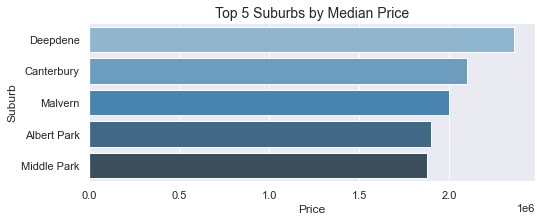

In [67]:
plot_order = df.groupby(['Suburb'])['Price'].median().sort_values(ascending=False).head().index.values
ax = sns.catplot(data = df, x='Price',  y='Suburb',kind='bar', palette="Blues_d",
                 ci=None,estimator=np.median,legend_out=False, order=plot_order[0:6], height=3.0, aspect=10/4);
plt.title('Top 5 Suburbs by Median Price', fontsize=14);
#ax.cat_label(ax.containers[0]);

- From the above we can obseve that Deepdene is the most expensive suburb with the median price of 2.3 million. Followed by Canterbury by 2.1 million. Malvern is by 2 million and Albert Park and Middle park around 1.8 to 1.9 million.

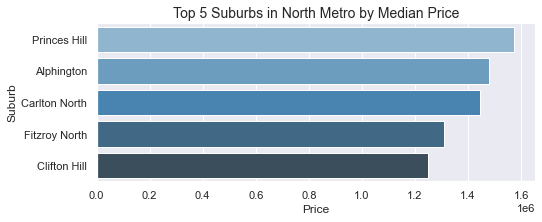

In [68]:
plot_order = north_metro.groupby(['Suburb'])['Price'].median().sort_values(ascending=False).head().index.values
ax = sns.catplot(data=north_metro, x='Price',  y='Suburb',kind='bar', palette="Blues_d",
                 ci=None,estimator=np.median,legend_out=False, order=plot_order[0:6], height=3.0, aspect=10/4);
plt.title('Top 5 Suburbs in North Metro by Median Price', fontsize=14);
#ax.cat_label(ax.containers[0]);

- From the above we can observe suburb Princes Hill having highest median price of 1.5 million in North Metro. Followed by  Alphington and so on.

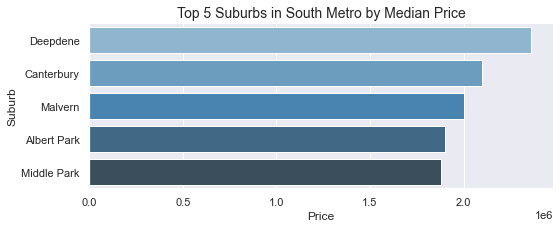

In [69]:
plot_order = south_metro.groupby(['Suburb'])['Price'].median().sort_values(ascending=False).head().index.values
ax = sns.catplot(data=south_metro, x='Price',  y='Suburb',kind='bar', palette="Blues_d",
                 ci=None,estimator=np.median,legend_out=False, order=plot_order[0:6], height=3.1, aspect=10/4);
plt.title('Top 5 Suburbs in South Metro by Median Price', fontsize=14);

- From the above we can observe suburb Deepdene having highest median price of 2mil in South Metro. Followed by Canterbury and so on.

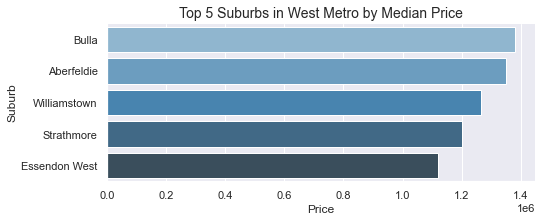

In [70]:
plot_order = west_metro.groupby(['Suburb'])['Price'].median().sort_values(ascending=False).head().index.values
ax = sns.catplot(data=west_metro, x='Price',  y='Suburb',kind='bar', palette="Blues_d",
                 ci=None,estimator=np.median,legend_out=False, order=plot_order[0:6], height=3.0, aspect=10/4);
plt.title('Top 5 Suburbs in West Metro by Median Price', fontsize=14);

- From the above we can observe suburb Bulla having highest median price of 1.3mil in North Metro. Followed by Aberfeldie and so on.

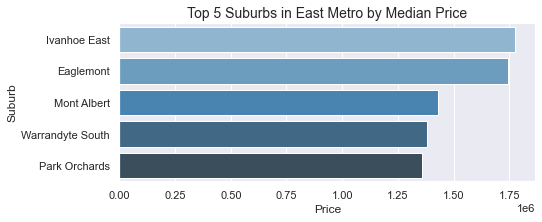

In [71]:
plot_order = east_metro.groupby(['Suburb'])['Price'].median().sort_values(ascending=False).head().index.values
ax = sns.catplot(data=east_metro, x='Price',  y='Suburb',kind='bar', palette="Blues_d",
                 ci=None,estimator=np.median,legend_out=False, order=plot_order[0:6], height=3.0, aspect=10/4);
plt.title('Top 5 Suburbs in East Metro by Median Price', fontsize=14);

- From the above we can observe suburb Ivanhoe East having highest median price of 1.7mil in East Metro. Followed by Eaglemont and so on.

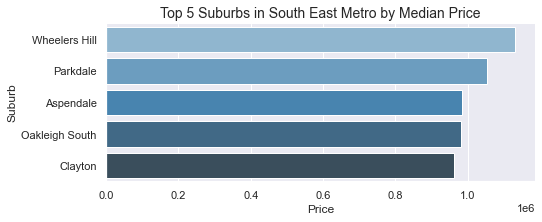

In [72]:
plot_order = se_metro.groupby(['Suburb'])['Price'].median().sort_values(ascending=False).head().index.values
ax = sns.catplot(data=se_metro, x='Price',  y='Suburb',kind='bar', palette="Blues_d",
                 ci=None,estimator=np.median,legend_out=False, order=plot_order[0:6], height=3.0, aspect=10/4);
plt.title('Top 5 Suburbs in South East Metro by Median Price', fontsize=14);

- From the above we can observe suburb Wheelers Hill having highest median price of 1.1mil in South East Metro. Followed by Parkdale and so on.

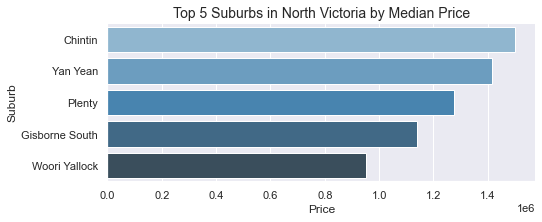

In [73]:
plot_order = nrth_vic.groupby(['Suburb'])['Price'].median().sort_values(ascending=False).head().index.values
ax = sns.catplot(data=nrth_vic, x='Price',  y='Suburb',kind='bar', palette="Blues_d",
                 ci=None,estimator=np.median,legend_out=False, order=plot_order[0:6], height=3.0, aspect=10/4);
plt.title('Top 5 Suburbs in North Victoria by Median Price', fontsize=14);

- From the above we can observe suburb Chintin having highest median price of 1.5mil in North Victoria. Followed by Yan Yean and so on.

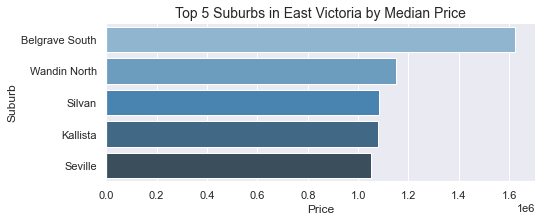

In [74]:
plot_order = east_vic.groupby(['Suburb'])['Price'].median().sort_values(ascending=False).head().index.values
ax = sns.catplot(data=east_vic, x='Price',  y='Suburb',kind='bar', palette="Blues_d",
                 ci=None,estimator=np.median,legend_out=False, order=plot_order[0:6], height=3.0, aspect=10/4);
plt.title('Top 5 Suburbs in East Victoria by Median Price', fontsize=14);

- From the above we can observe suburb Belgrave South having highest median price of 1.6mil in East Victoria. Followed by Wandin North and so on.

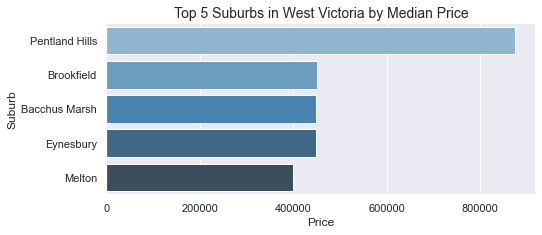

In [75]:
plot_order = west_vic.groupby(['Suburb'])['Price'].median().sort_values(ascending=False).head().index.values
ax = sns.catplot(data=west_vic, x='Price',  y='Suburb',kind='bar', palette="Blues_d",
                 ci=None,estimator=np.median,legend_out=False, order=plot_order[0:6], height=3.0, aspect=10/4);
plt.title('Top 5 Suburbs in West Victoria by Median Price', fontsize=14);

- From the above we can observe suburb Pentland Hills having highest median price of 875k in West Victoria. Followed by Brookfield and so on.

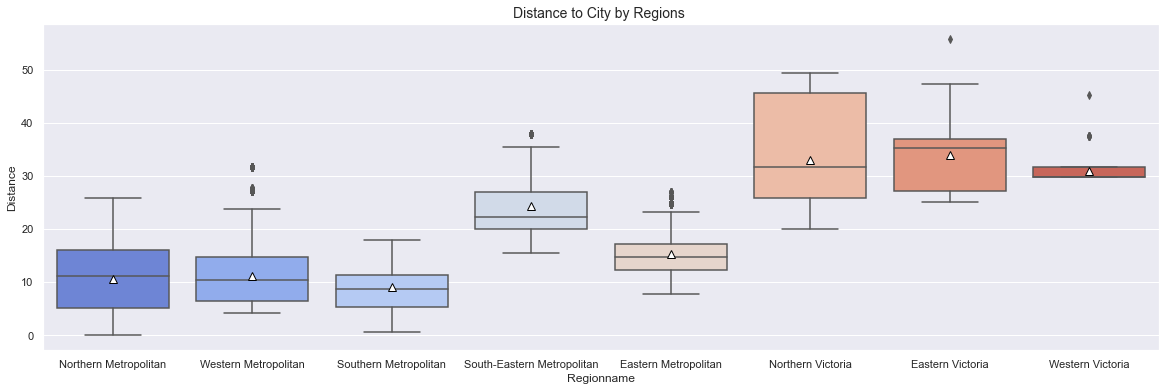

In [76]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Regionname',y='Distance',data=df,palette='coolwarm',showmeans=True,
            meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
plt.title('Distance to City by Regions ', fontsize=14);

In [77]:
kilometers_check = df.groupby(['Regionname']).agg({'Distance':['mean','min','max']}).round(decimals=2)
(kilometers_check.style.highlight_max(color='#cd4f39').highlight_min(color='lightgreen'))

- From the above we can observe that Northern Metropolitan and Southern Metropolitan having minimum distance to city.
- Max distance to city is for Eastern Victoria, Northern Victoria and Western Victoria.
- Among all the Regions Southern Metropolitan having lesser average distance to city, followed by Norther Metropolitan and Western Metroplitan.

In [78]:
council_distance = df.groupby(['Regionname','CouncilArea']).agg({'Distance':['mean','min','max']}).round(decimals=2)
council_distance
council_distance.style.bar(subset=['Distance'], color='#0e92ea')

- From the above, we can observe that Western, Eastern, and Northern Victoria councils have a longer distance to the city.
- Southern and Northern Metropolitan Councils have a lesser distance to the city.

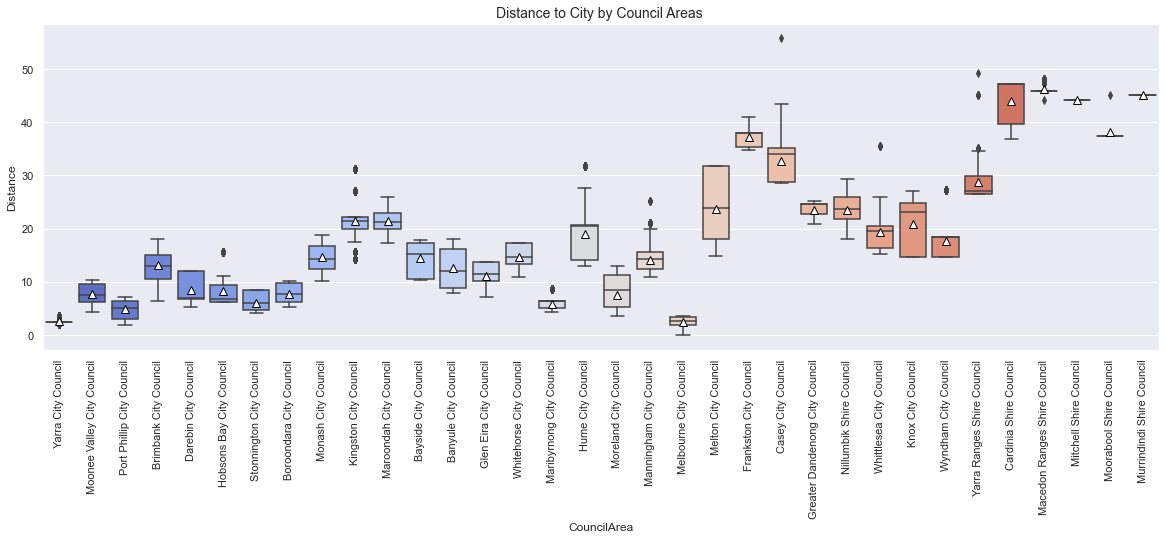

In [79]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x='CouncilArea',y='Distance',data=df, palette='coolwarm',showmeans=True,
            meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
plt.title('Distance to City by Council Areas ', fontsize=14);

- From the above, we can observe that Melbourne City council is closest to the city, followed by Yara City Council and Port Phillip City Council.
- The farthest distance we can observe is for Casey City council, Yara Ranger city Council and so on.

### YoY growth rate analysis.
- In the below I Will analyze the growth rate by year and Regions.
- Note: for the year 2018, we have data from Jan to Oct. Therefore, the stats on 2018 will be inaccurate to make any conclusions.

**YoY growth rate by Year.**

In [80]:
# apply groupby by year.
growth_rate_year = df.groupby(['Year'])['Price'].sum().reset_index()
growth_rate_year

,Year,Price
0,2016,1.264951e+10
1,2017,2.066304e+10
2,2018,1.501866e+10


In [81]:
# apply growth rate by year to Price by creating a column
growth_rate_year['yoy_growth_rate'] = growth_rate_year.sort_values('Year').transform(lambda x:x.pct_change())['Price']

In [82]:
growth_rate_year

,Year,Price,yoy_growth_rate
0,2016,1.264951e+10,NaN
1,2017,2.066304e+10,0.633505
2,2018,1.501866e+10,-0.273163


In [83]:
# drop the earliest year, which will hvae nan value.
growth_rate_year_chart=growth_rate_year[growth_rate_year['Year']!=2016]
growth_rate_year_chart

,Year,Price,yoy_growth_rate
1,2017,2.066304e+10,0.633505
2,2018,1.501866e+10,-0.273163


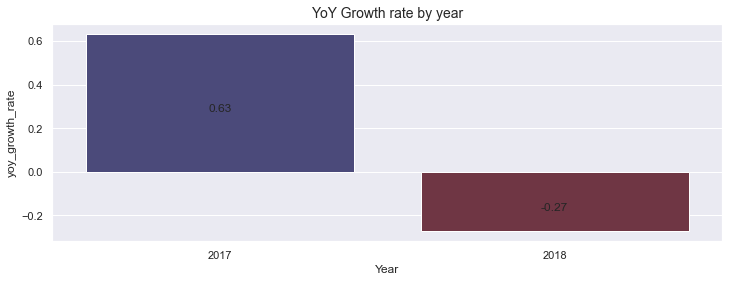

In [84]:
# apply chart to visualize the growth rate for 2017 and 2018
plt.figure(figsize=(12,4))
ax = sns.barplot(x='Year', y='yoy_growth_rate', data=growth_rate_year_chart, ci=None, palette='icefire')
plt.title('YoY Growth rate by year', fontsize=14);
ax.bar_label(ax.containers[0], fmt='\n%.2f', label_type='center');

- From the above we can visuzlize that in the year 2017 there was a growth of 63% and in the year 2018 we can observe the drop in growth rate by -27%.

**YoY growth rate by Year and Regionname**

In [85]:
# apply groupby by year and region name.
growth_rate_region = df.groupby(['Year','Regionname'])['Price'].sum().reset_index()
growth_rate_region

,Year,Regionname,Price
0,2016,Eastern Metropolitan,2.247488e+09
1,2016,Eastern Victoria,3.593310e+07
2,2016,Northern Metropolitan,2.629916e+09
3,2016,Northern Victoria,4.035050e+07
4,2016,South-Eastern Metropolitan,9.066823e+08
5,2016,Southern Metropolitan,4.939257e+09
6,2016,Western Metropolitan,1.846206e+09
7,2016,Western Victoria,3.676500e+06
8,2017,Eastern Metropolitan,3.533876e+09
9,2017,Eastern Victoria,1.361715e+08


In [86]:
# apply growrate by year and region name by price.
growth_rate_region['yoy_growth_rate'] = growth_rate_region.sort_values("Year").groupby(['Regionname'])\
.transform(lambda x:x.pct_change())['Price']

In [87]:
# exclude earliest year, as earliest year will hvae nan values.
growth_rate_region_chart = growth_rate_region[growth_rate_region['Year']!=2016]
growth_rate_region_chart

,Year,Regionname,Price,yoy_growth_rate
8,2017,Eastern Metropolitan,3.533876e+09,0.572367
9,2017,Eastern Victoria,1.361715e+08,2.789583
10,2017,Northern Metropolitan,4.775504e+09,0.815839
11,2017,Northern Victoria,1.235459e+08,2.061818
12,2017,South-Eastern Metropolitan,1.494860e+09,0.648714
13,2017,Southern Metropolitan,7.204478e+09,0.458616
14,2017,Western Metropolitan,3.348912e+09,0.813943
15,2017,Western Victoria,4.569125e+07,11.427921
16,2018,Eastern Metropolitan,2.348523e+09,-0.335426
17,2018,Eastern Victoria,8.571935e+07,-0.370504


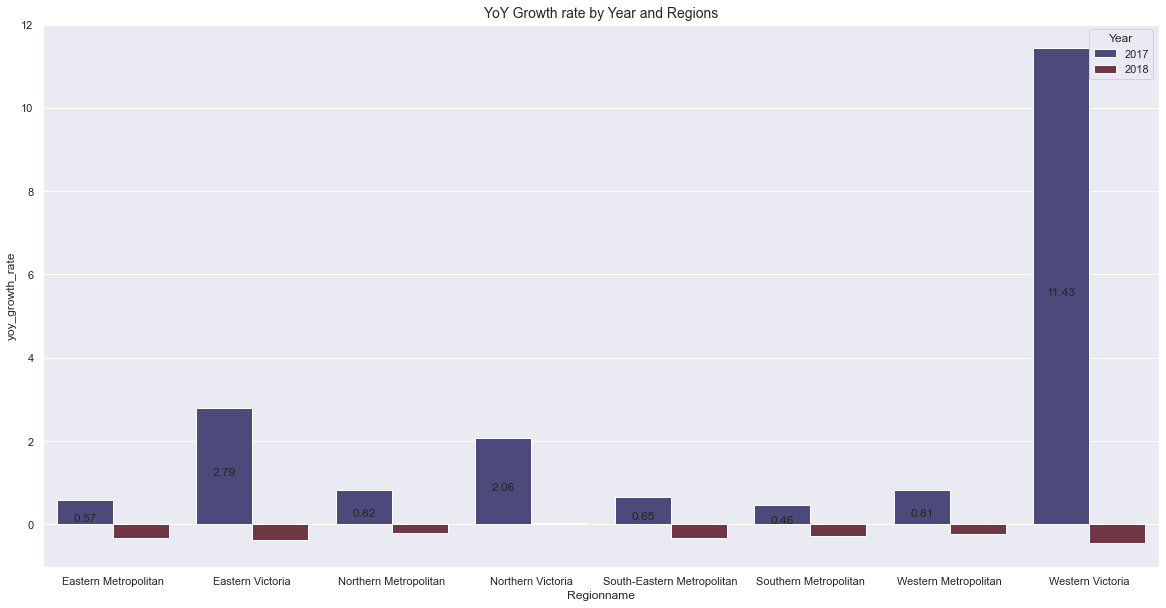

In [88]:
# apply chart to visualize the growth rate by year and region name.
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Regionname', y='yoy_growth_rate', hue='Year',data=growth_rate_region_chart, ci=None, palette='icefire')
plt.title('YoY Growth rate by Year and Regions', fontsize=14);
ax.bar_label(ax.containers[0], fmt='\n%.2f', label_type='center');

- From the above we can observe that in the year 2017 all the regions have positive growth rate. In the year 2018 we can observe that the growth rate falling down, this could be because we do not hvae complete data for the year 2018. For the year 2018 we hvae data from Jan to Oct.